**Machine Learning - Supervised Learning**

**Hand Gesture Classification**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler , RobustScaler
import seaborn as sns
from sklearn.model_selection import train_test_split ,  GridSearchCV ,  StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost as xgb
import numpy as np



In [2]:
gestures_data = pd.read_csv("hand_landmarks_data.csv")

In [5]:
gestures_data.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


**Check the columns**

In [6]:
gestures_data.columns

Index(['x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4', 'y4', 'z4',
       'x5', 'y5', 'z5', 'x6', 'y6', 'z6', 'x7', 'y7', 'z7', 'x8', 'y8', 'z8',
       'x9', 'y9', 'z9', 'x10', 'y10', 'z10', 'x11', 'y11', 'z11', 'x12',
       'y12', 'z12', 'x13', 'y13', 'z13', 'x14', 'y14', 'z14', 'x15', 'y15',
       'z15', 'x16', 'y16', 'z16', 'x17', 'y17', 'z17', 'x18', 'y18', 'z18',
       'x19', 'y19', 'z19', 'x20', 'y20', 'z20', 'x21', 'y21', 'z21', 'label'],
      dtype='object')

**Label was found --> Supervised Learning Problem**

In [7]:
gestures_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

**Check if it is classification or regression problem based on label**

In [6]:
print(gestures_data["label"].unique())

['call' 'dislike' 'fist' 'four' 'like' 'mute' 'ok' 'one' 'palm' 'peace'
 'peace_inverted' 'rock' 'stop' 'stop_inverted' 'three' 'three2' 'two_up'
 'two_up_inverted']


**Classification**

**Check if classes are balanced to decide suitable testing metric**

In [7]:
gestures_data.value_counts("label")

label
three2             1653
palm               1649
four               1634
ok                 1592
stop_inverted      1567
call               1506
peace_inverted     1497
stop               1482
rock               1458
three              1456
peace              1441
like               1436
two_up_inverted    1371
two_up             1343
dislike            1295
one                1263
mute               1087
fist                945
Name: count, dtype: int64

**Data is practically balanced --> we can use accuracy as a testing mertic**


**Check for duplicates**

In [8]:
gestures_data.duplicated().sum()

np.int64(0)

**No duplicates**

**Check for nans**

In [9]:
gestures_data.isnull().values.any()

np.False_

**No nans**

**Check outliers**

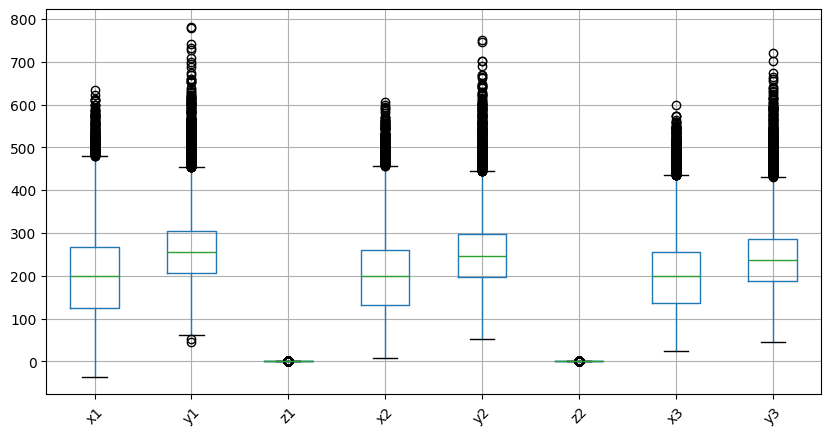

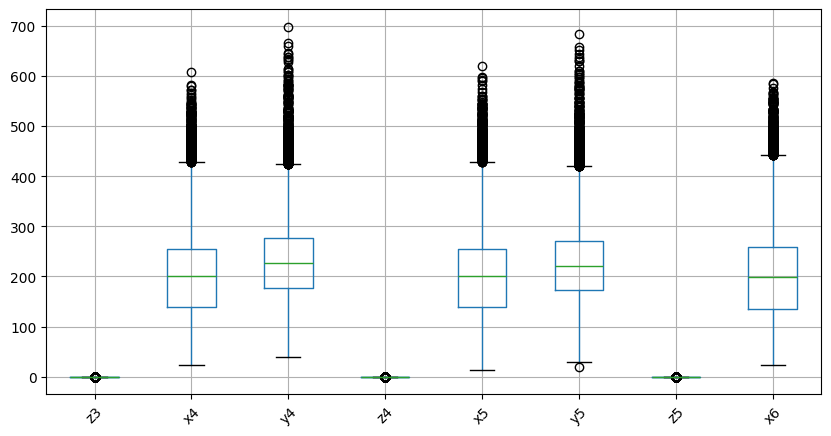

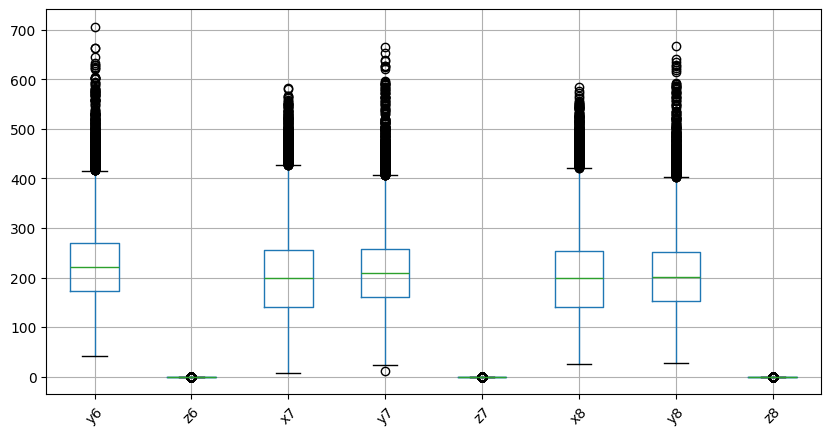

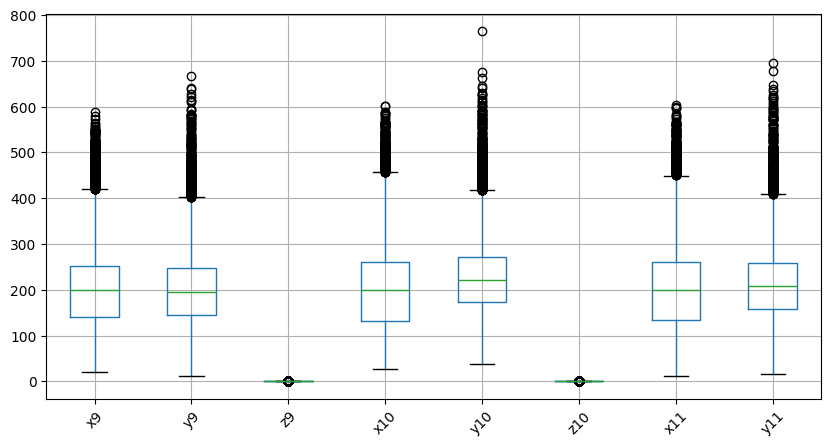

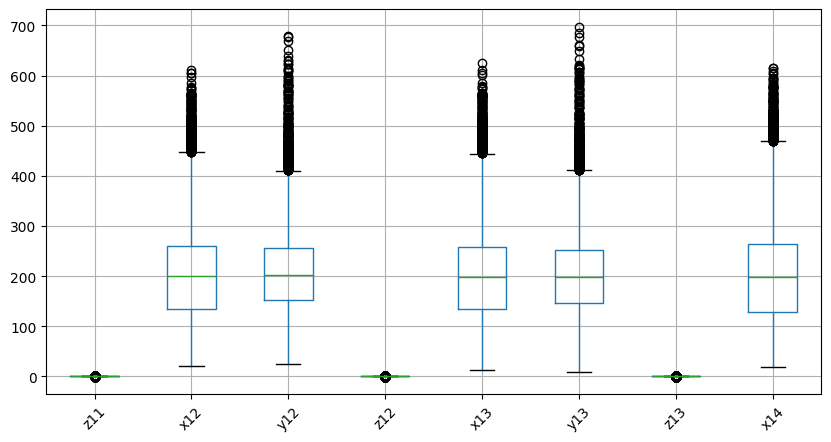

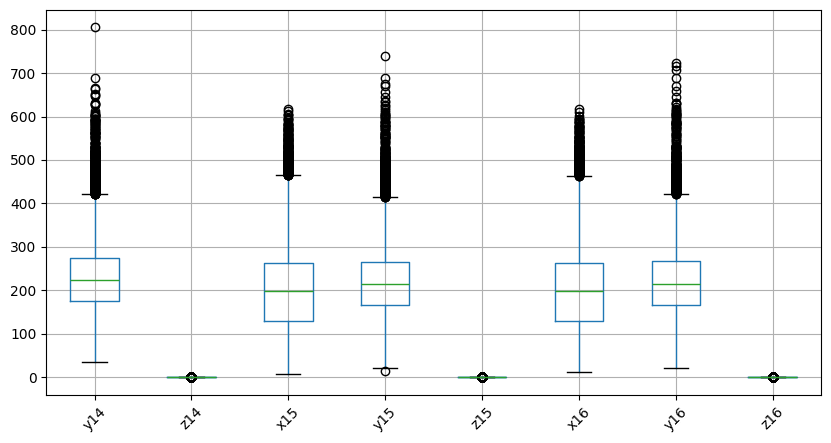

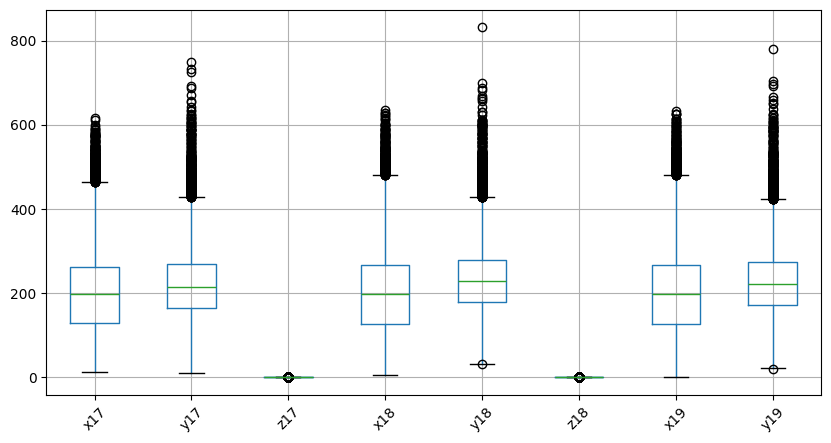

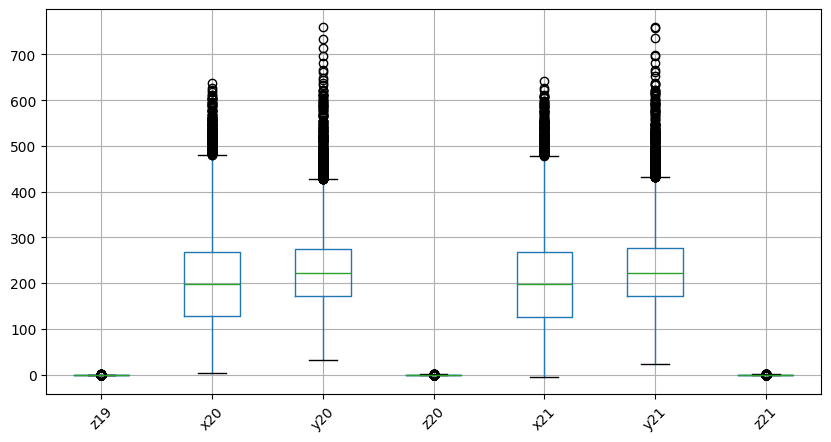

In [4]:
numeric_values = gestures_data.select_dtypes(include=['number'])
for i in range(0, len(numeric_values.columns), 8):
    numeric_values.iloc[:, i:i+8].boxplot(figsize=(10,5))
    plt.xticks(rotation=45)
    plt.show()


**Check distribution of each feature**

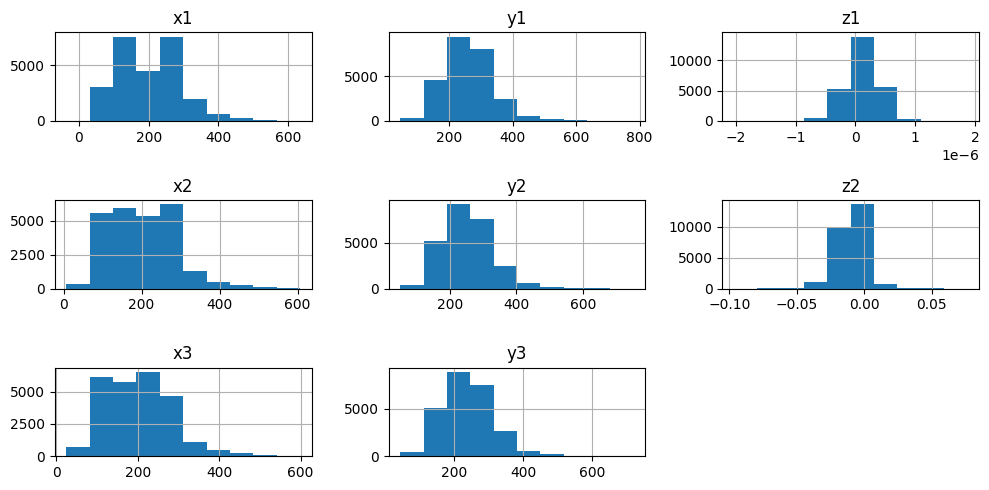

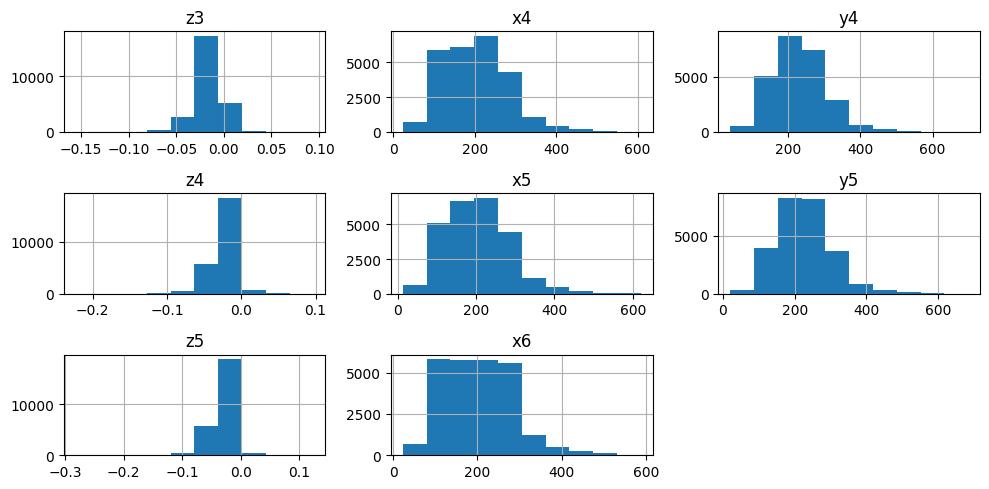

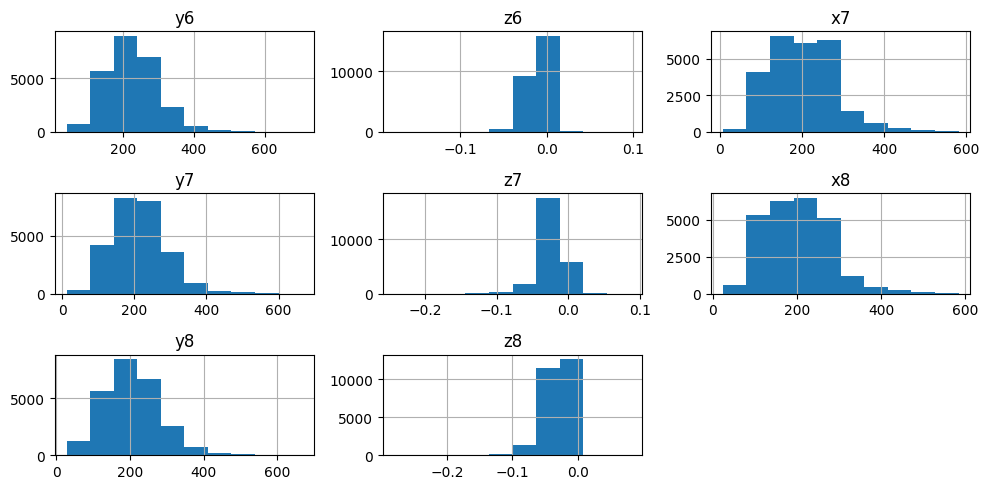

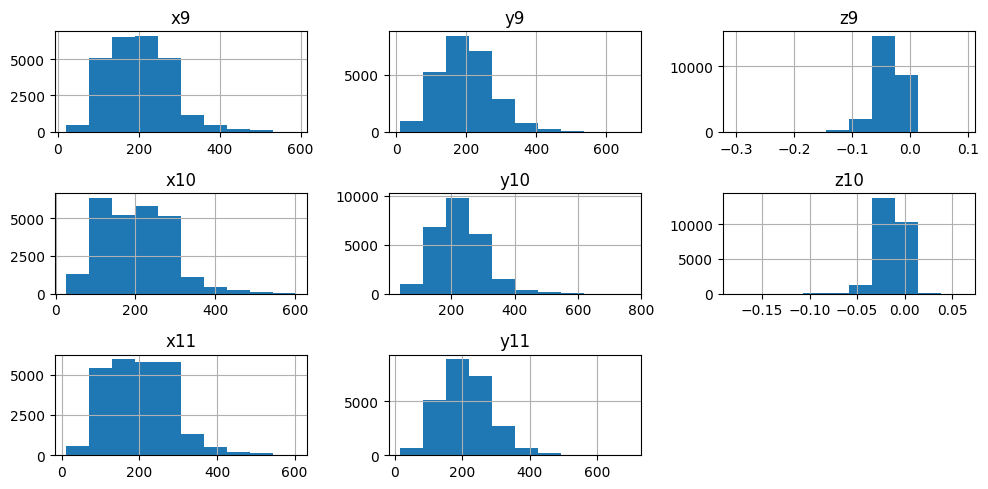

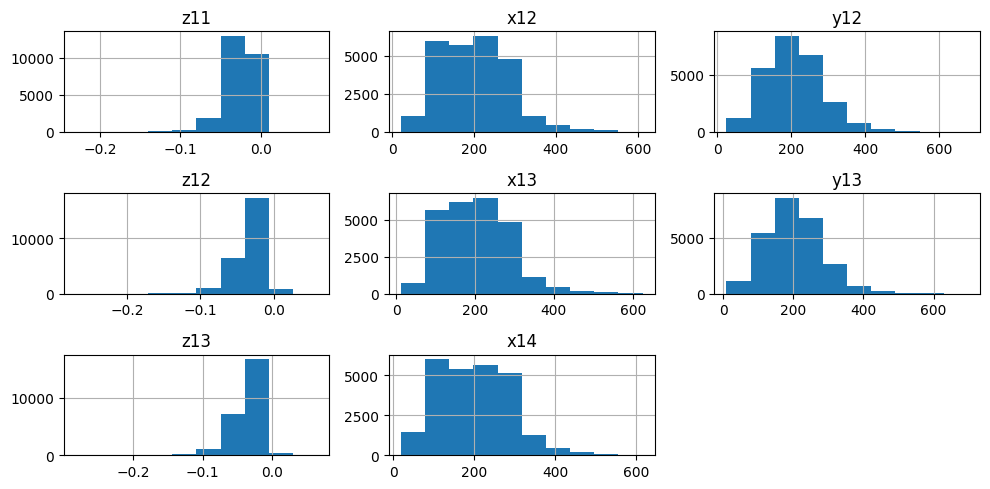

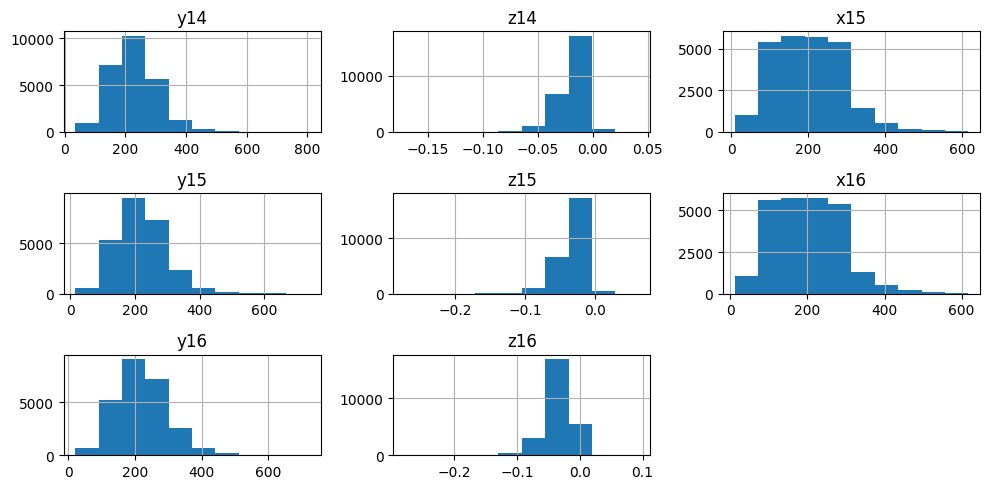

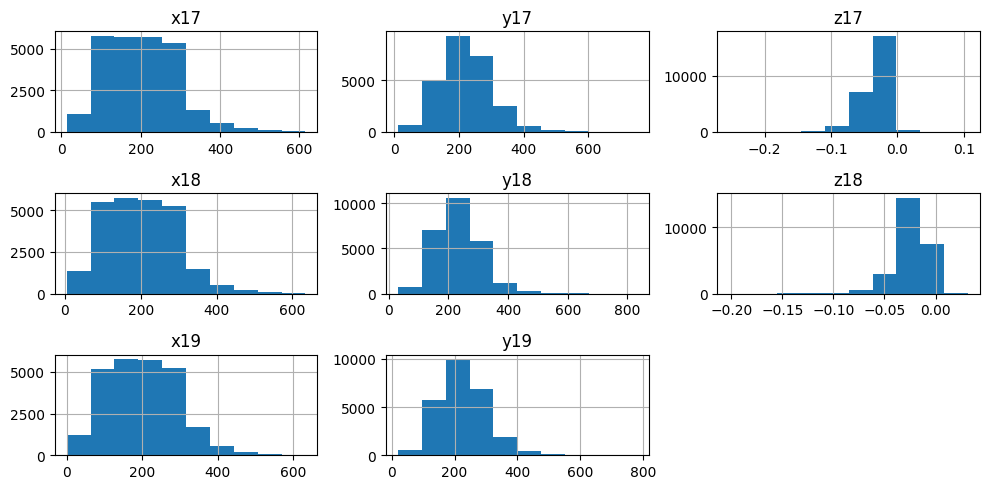

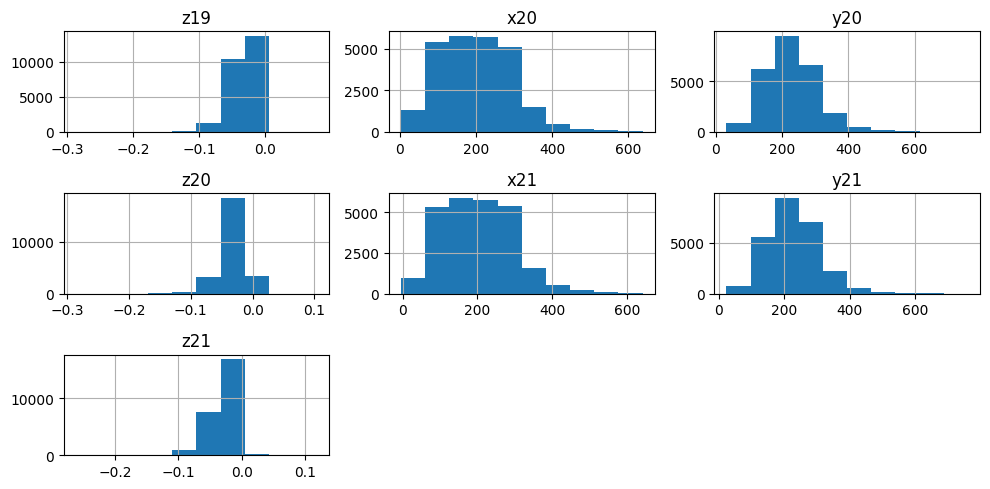

In [12]:
for i in range(0, len(numeric_values.columns), 8):
    numeric_values.iloc[:, i:i+8].hist(figsize=(10,5))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Most of the features is right skewed**

**Also right skweness here doesn't mean anything since that they're coordinates**

**Check for relationships between variables**

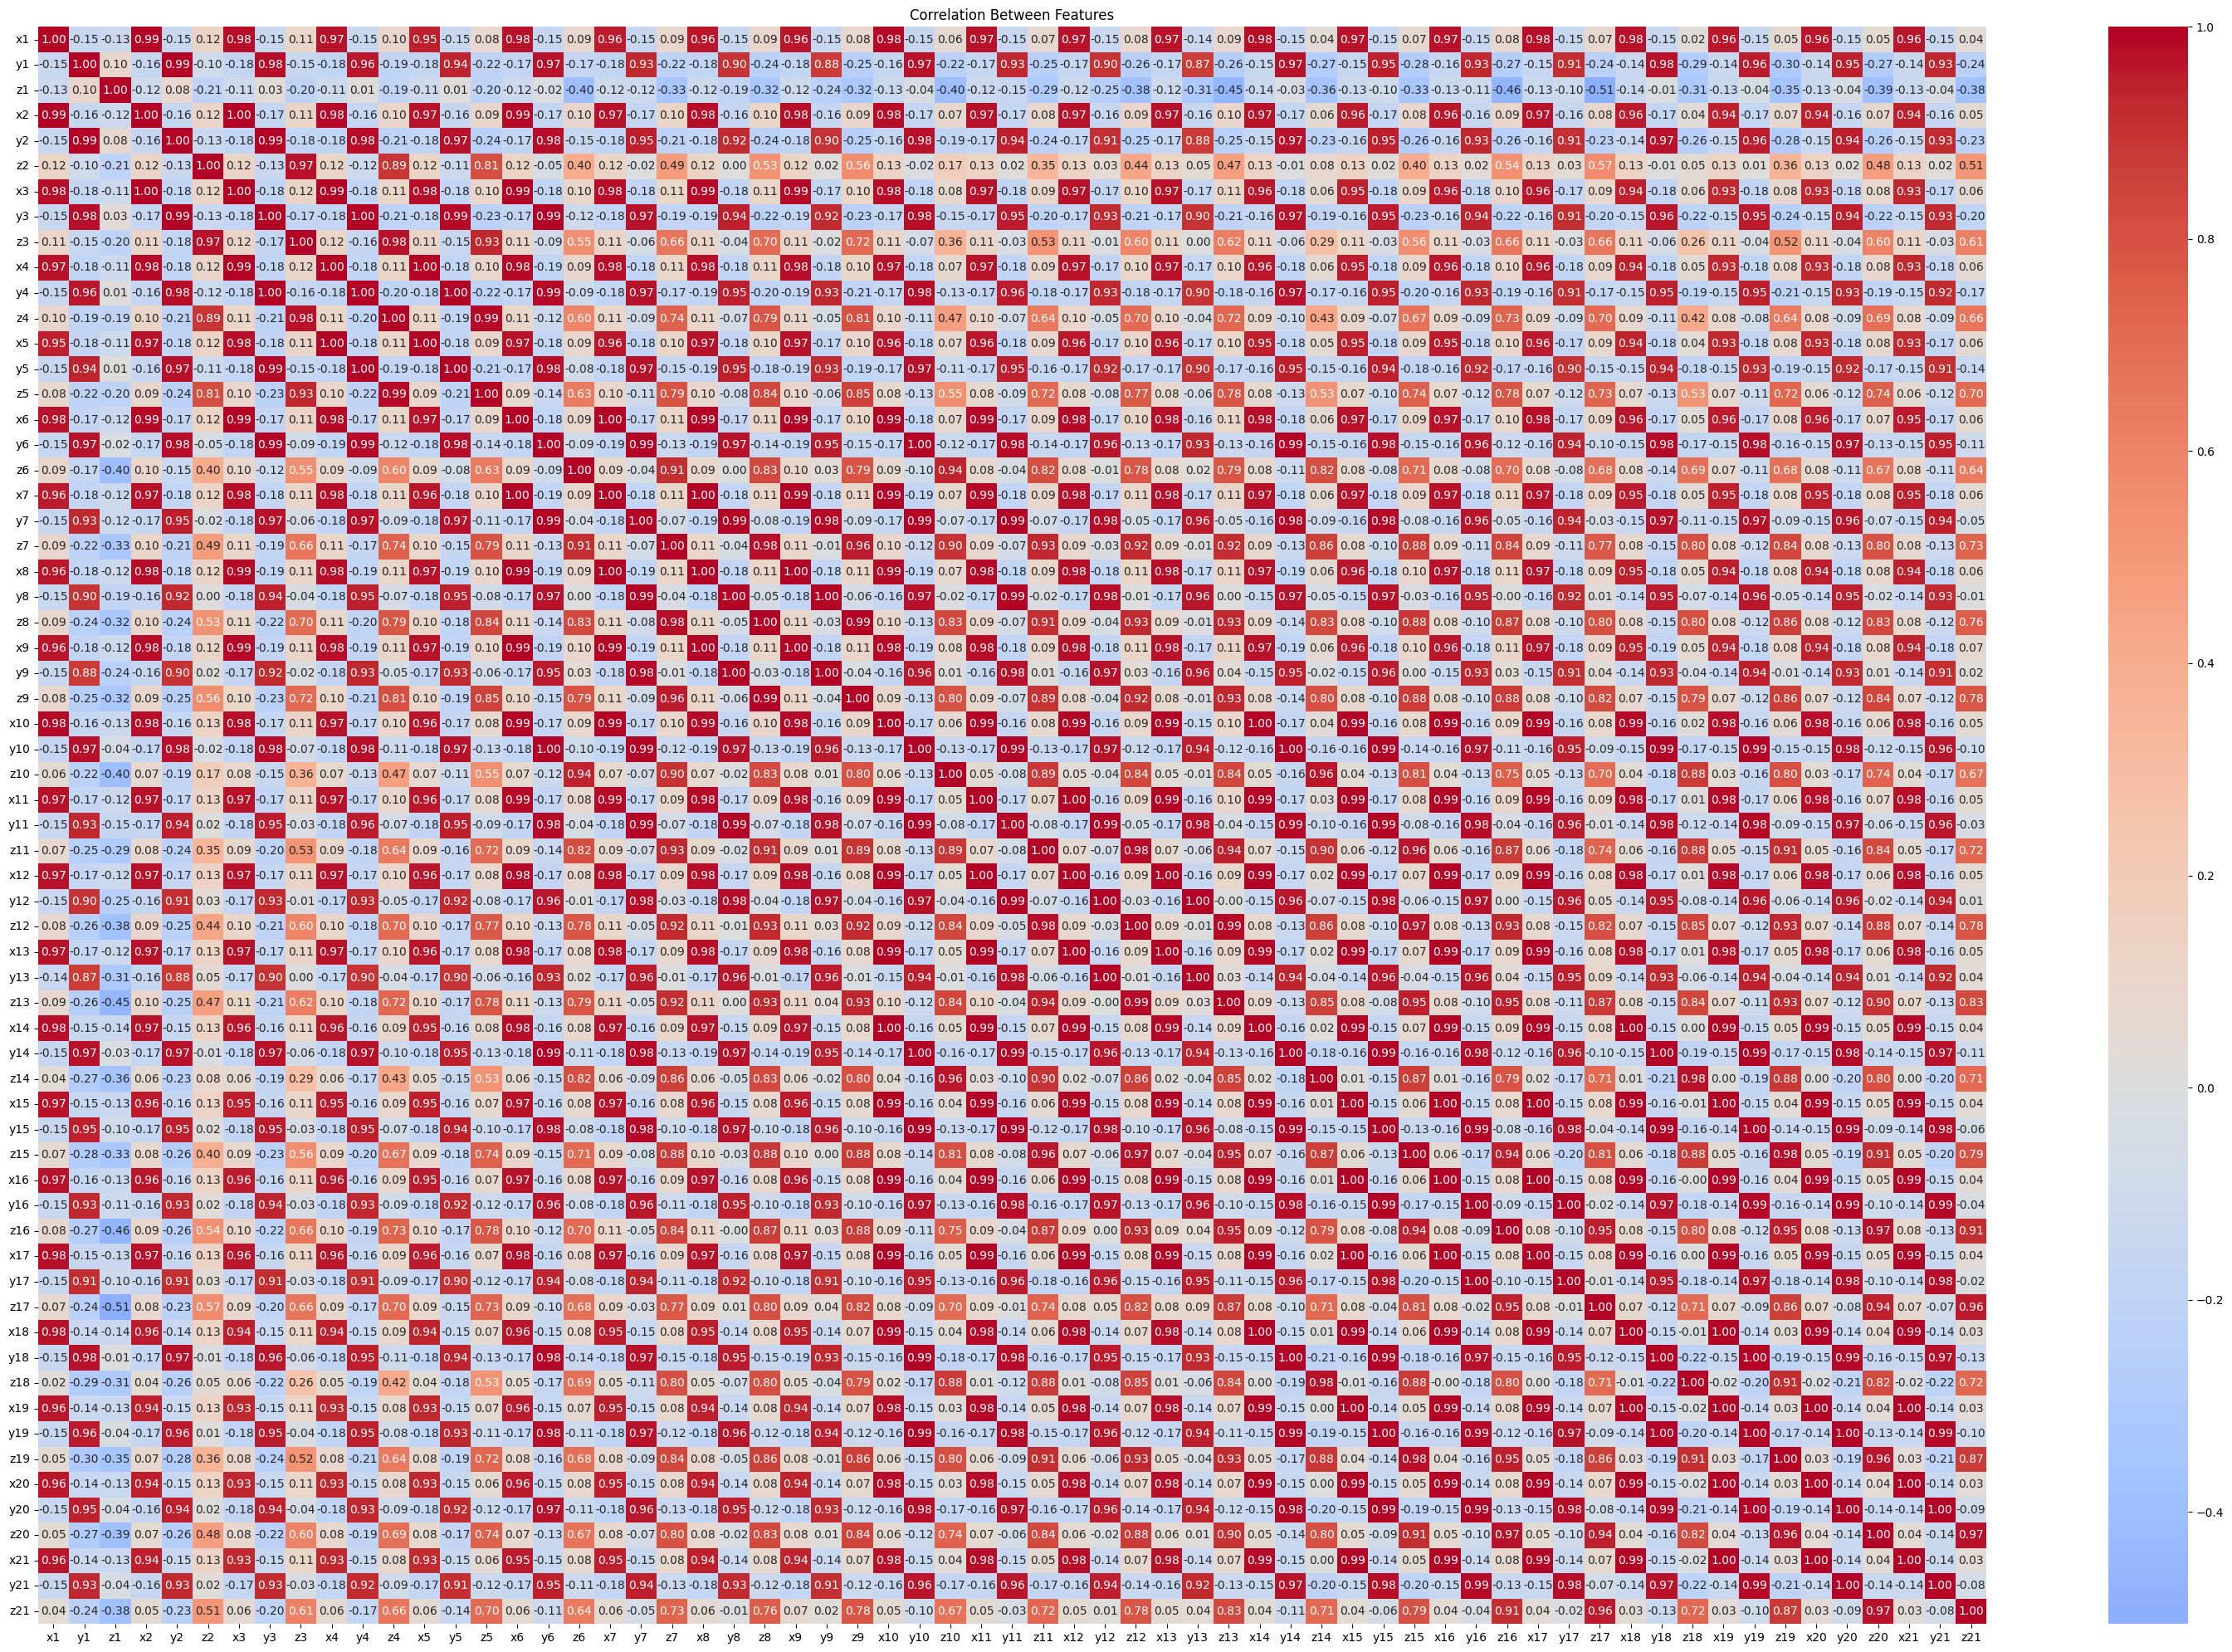

In [13]:
corr = numeric_values.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("Correlation Between Features")
plt.tight_layout()
plt.show()

**Encode the labels**


In [6]:
le = LabelEncoder()
y_encoded = le.fit_transform(gestures_data['label'])

**Check value ranges for each column to see if we need feature scaling**

In [12]:
for col in numeric_values:
  print(f'{col}: {numeric_values[col].min()} - {numeric_values[col].max()}')

x1: -36.050926208496094 - 633.5560204982758
y1: 45.722923278808594 - 781.6744686961174
z1: -2.0299864900152897e-06 - 1.8762541458272608e-06
x2: 7.184680938720703 - 606.2323857545853
y2: 51.25683975219727 - 751.869416475296
z2: -0.0966300815343856 - 0.0763652473688125
x3: 25.11432266235352 - 598.5413481593132
y3: 45.48995018005371 - 719.3650101423264
z3: -0.1558459252119064 - 0.0941309481859207
x4: 23.44634056091309 - 607.9998006224632
y4: 38.85153579711914 - 698.6612769365311
z4: -0.2232581675052642 - 0.0971984565258026
x5: 13.24354076385498 - 620.0954483747482
y5: 19.964561462402344 - 683.6437369585037
z5: -0.2825779318809509 - 0.1244294121861457
x6: 23.00773000717163 - 586.9397245645523
y6: 41.02554321289063 - 705.950987637043
z6: -0.1760022342205047 - 0.0969221666455268
x7: 7.846867561340332 - 581.6732858419418
y7: 12.058107376098633 - 665.6708094477654
z7: -0.2426135390996933 - 0.0865698158740997
x8: 24.513307571411133 - 583.6105105876923
y8: 27.7646541595459 - 667.6467625498772
z8

**We'll need to scale the data as features have different ranges , and that may affect learning process in models like SVM and Logistic Regression as large values will dominate the distance in case of SVM or gradient in case of Logistic Regression**

In [7]:
X_train,X_test_validate,y_train,y_test_validate = train_test_split(numeric_values,y_encoded,test_size=0.4 , stratify=y_encoded ,  random_state=42 )
X_validate , X_test , y_validate , y_test = train_test_split(X_test_validate,y_test_validate,test_size=0.5 , stratify=y_test_validate ,  random_state=42)

**Using min max scalar**

In [11]:
minmax_scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = minmax_scaler.fit_transform(X_train)

In [ ]:
len(data_normalized) 

15405

**Using Robust Scalar**

In [11]:
robust_scaler = RobustScaler()
robust_scaled_data = robust_scaler.fit_transform(X_train)

**Using Translation and Scale Normalization**

In [8]:
def normalize_row(row):
    
    landmarks = row.values.reshape(21, 3)
    
    wrist = landmarks[0]
    
    landmarks[:, 0] -= wrist[0]   
    landmarks[:, 1] -= wrist[1]  
    
    mid_tip = landmarks[12]
    scale = np.sqrt(mid_tip[0]**2 + mid_tip[1]**2)
    
    if scale == 0:
        scale = 1e-6
    
    landmarks[:, 0] /= scale
    landmarks[:, 1] /= scale
    
    return landmarks.flatten()


X_normalized = X_train.apply(normalize_row, axis=1, result_type='expand')

X_normalized.columns = X_train.columns

In [9]:
X_val_normalized = X_validate.apply(normalize_row, axis=1, result_type='expand')
X_val_normalized.columns = X_train.columns

In [10]:
X_test_normalized = X_test.apply(normalize_row, axis=1, result_type='expand')
X_test_normalized.columns = X_train.columns

**Applied spatial normalization by translating landmarks to the wrist origin and scaling them using the middle finger tip distance to achieve translation and scale invariance.**

**Training Models**

**Logistic Regression**

In [ ]:
lr_model = LogisticRegression(max_iter = 10000 , random_state=42)
lr_model.fit(X_train,y_train)
lr_predict = lr_model.predict(X_validate)
lr_model.score(X_validate,y_validate)

c:\Users\hazem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9067185978578384

**Logistic Regression with min max scaled data**

In [ ]:
lr_model = LogisticRegression(max_iter = 10000 , random_state=42)
lr_model.fit(data_normalized,y_train)
val_normalized = minmax_scaler.transform(X_validate)
lr_predict = lr_model.predict(val_normalized)
lr_model.score(val_normalized,y_validate)

0.29951314508276533

**Logistic Regression with robust scalar**

In [ ]:
lr_model = LogisticRegression(max_iter = 10000 , random_state=42)
lr_model.fit(robust_scaled_data,y_train)
val_normalized = robust_scaler.transform(X_validate)
lr_predict = lr_model.predict(val_normalized)
lr_model.score(val_normalized,y_validate)

0.9076923076923077

**Robust scalar gave the same accuracy as the normal data but converged faster**

**Logistic Regression with Translation and Scale Normalization**

In [ ]:
lr_model = LogisticRegression(max_iter = 10000 , random_state=42)
lr_model.fit(X_normalized,y_train)
lr_predict = lr_model.predict(X_val_normalized)
lr_model.score(X_val_normalized,y_validate)

c:\Users\hazem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\hazem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.8479065238558909

**Trying grid search**


In [ ]:
param_grid= [
    {'penalty': ['l2'], 'C': [0.1, 1, 10]},             
    {'penalty': ['l1'], 'C': [0.1, 1]},                 
    {'penalty': ['elasticnet'], 'C': [1], 'l1_ratio':[0.5]}
]
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_lr = GridSearchCV(
    estimator= LogisticRegression(max_iter=1000, solver='saga'),
    param_grid=param_grid,
    scoring='accuracy',
    cv=stratified_cv,  
    n_jobs=-1, 
    verbose=1
)

grid_lr.fit(X_train, y_train)

print("Best Parameters:", grid_lr.best_params_)
print("Best CV Accuracy:", grid_lr.best_score_)

y_pred = grid_lr.predict(X_validate)
print("Classification Report:\n")
print(classification_report(y_validate, y_pred))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\hazem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\hazem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


Best Parameters: {'C': 1, 'penalty': 'l1'}
Best CV Accuracy: 0.8247971437844855
Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       301
           1       1.00      1.00      1.00       259
           2       0.99      0.98      0.99       189
           3       0.86      0.79      0.82       327
           4       0.92      0.90      0.91       287
           5       0.86      0.80      0.83       218
           6       0.99      0.98      0.99       319
           7       0.84      0.89      0.86       253
           8       0.79      0.82      0.80       330
           9       0.56      0.53      0.55       288
          10       0.70      0.73      0.71       300
          11       1.00      0.99      0.99       291
          12       0.82      0.91      0.86       296
          13       0.95      0.95      0.95       313
          14       1.00      0.96      0.98       291
          15       0.62      0.

c:\Users\hazem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
param_grid= [
    {'penalty': ['l2'], 'C': [0.1, 1, 10]},             
    {'penalty': ['l1'], 'C': [0.1, 1]},                 
    {'penalty': ['elasticnet'], 'C': [1], 'l1_ratio':[0.5]}
]
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_lr = GridSearchCV(
    estimator= LogisticRegression(class_weight='balanced', max_iter=1000, solver='saga'), 
    param_grid=param_grid,
    scoring='accuracy',
    cv=stratified_cv,  
    n_jobs=-1, 
    verbose=1
)

grid_lr.fit(X_train, y_train)

print("Best Parameters:", grid_lr.best_params_)
print("Best CV Accuracy:", grid_lr.best_score_)

y_pred = grid_lr.predict(X_validate)
print("Classification Report:\n")
print(classification_report(y_validate, y_pred))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\hazem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\hazem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


Best Parameters: {'C': 1, 'penalty': 'l1'}
Best CV Accuracy: 0.8255111976630964
Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       301
           1       1.00      1.00      1.00       259
           2       0.99      0.98      0.99       189
           3       0.86      0.76      0.81       327
           4       0.91      0.91      0.91       287
           5       0.85      0.85      0.85       218
           6       0.99      0.98      0.99       319
           7       0.87      0.87      0.87       253
           8       0.79      0.80      0.79       330
           9       0.55      0.56      0.55       288
          10       0.73      0.67      0.70       300
          11       1.00      0.99      0.99       291
          12       0.80      0.92      0.85       296
          13       0.95      0.94      0.95       313
          14       0.98      0.96      0.97       291
          15       0.66      0.

c:\Users\hazem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
param_grid= [
    {'penalty': ['l2'], 'C': [0.1, 1, 10]},             
    {'penalty': ['l1'], 'C': [0.1, 1]},                 
    {'penalty': ['elasticnet'], 'C': [1], 'l1_ratio':[0.5]}
]
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_lr = GridSearchCV(
    estimator= LogisticRegression(class_weight='balanced', max_iter=1000, solver='saga'), 
    param_grid=param_grid,
    scoring='accuracy',
    cv=stratified_cv,  
    n_jobs=-1, 
    verbose=1
)

grid_lr.fit(data_normalized, y_train)

print("Best Parameters:", grid_lr.best_params_)
print("Best CV Accuracy:", grid_lr.best_score_)

validation_normalized = minmax_scaler.fit_transform(X_validate)
y_pred = grid_lr.predict(validation_normalized)
print("Classification Report:\n")
print(classification_report(y_validate, y_pred))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\hazem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


Best Parameters: {'C': 10, 'penalty': 'l2'}
Best CV Accuracy: 0.8543330087633885
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       301
           1       0.97      0.75      0.85       259
           2       0.59      0.72      0.65       189
           3       0.00      0.00      0.00       327
           4       0.18      1.00      0.31       287
           5       0.95      0.17      0.28       218
           6       0.98      0.19      0.32       319
           7       0.27      0.64      0.38       253
           8       1.00      0.01      0.01       330
           9       0.00      0.00      0.00       288
          10       0.61      0.13      0.21       300
          11       1.00      0.01      0.01       291
          12       0.27      0.72      0.39       296
          13       0.90      0.34      0.49       313
          14       1.00      0.09      0.16       291
          15       0.00      0

c:\Users\hazem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hazem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hazem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

**Logistic Regression with grid search using Translation and Scale Normalization**

In [ ]:
param_grid= [
    {'penalty': ['l2'], 'C': [0.1, 1, 10]},             
    {'penalty': ['l1'], 'C': [0.1, 1]},                 
    {'penalty': ['elasticnet'], 'C': [1], 'l1_ratio':[0.5]}
]
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_lr = GridSearchCV(
    estimator= LogisticRegression(class_weight='balanced', max_iter=1000, solver='saga'), 
    param_grid=param_grid,
    scoring='accuracy',
    cv=stratified_cv,  
    n_jobs=-1, 
    verbose=1
)

grid_lr.fit(X_normalized, y_train)

print("Best Parameters:", grid_lr.best_params_)
print("Best CV Accuracy:", grid_lr.best_score_)

y_pred = grid_lr.predict(X_val_normalized)
print("Classification Report:\n")
print(classification_report(y_validate, y_pred))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\hazem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


Best Parameters: {'C': 10, 'penalty': 'l2'}
Best CV Accuracy: 0.8528399870172022
Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       301
           1       1.00      1.00      1.00       259
           2       1.00      0.98      0.99       189
           3       0.88      0.78      0.83       327
           4       0.91      0.92      0.92       287
           5       0.96      0.95      0.96       218
           6       1.00      0.98      0.99       319
           7       0.97      0.96      0.96       253
           8       0.77      0.80      0.79       330
           9       0.61      0.52      0.56       288
          10       0.79      0.72      0.75       300
          11       1.00      0.98      0.99       291
          12       0.81      0.94      0.87       296
          13       0.97      0.98      0.98       313
          14       1.00      0.96      0.98       291
          15       0.71      0

c:\Users\hazem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hazem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
param_grid= [
    {'penalty': ['l2'], 'C': [0.1, 1, 5]},             
    {'penalty': ['l1'], 'C': [0.1, 1]},                 
    {'penalty': ['elasticnet'], 'C': [1], 'l1_ratio':[0.5]}
]
stratified_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid_lr = GridSearchCV(
    estimator= LogisticRegression(class_weight='balanced', max_iter=1000, solver='saga'), 
    param_grid=param_grid,
    scoring='accuracy',
    cv=stratified_cv,  
    n_jobs=-1, 
    verbose=1
)

grid_lr.fit(X_train, y_train)

print("Best Parameters:", grid_lr.best_params_)
print("Best CV Accuracy:", grid_lr.best_score_)

y_pred = grid_lr.predict(X_validate)
print("Classification Report:\n")
print(classification_report(y_validate, y_pred))

Fitting 3 folds for each of 6 candidates, totalling 18 fits


c:\Users\hazem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


Best Parameters: {'C': 5, 'penalty': 'l2'}
Best CV Accuracy: 0.818565400843882
Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       301
           1       1.00      1.00      1.00       259
           2       0.99      0.98      0.99       189
           3       0.86      0.76      0.81       327
           4       0.91      0.91      0.91       287
           5       0.85      0.85      0.85       218
           6       0.99      0.98      0.99       319
           7       0.87      0.87      0.87       253
           8       0.79      0.80      0.79       330
           9       0.55      0.56      0.56       288
          10       0.73      0.67      0.70       300
          11       1.00      0.99      0.99       291
          12       0.80      0.92      0.85       296
          13       0.95      0.94      0.95       313
          14       0.98      0.96      0.97       291
          15       0.67      0.6

c:\Users\hazem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**SVM**

In [ ]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train,y_train)
svm_prediction = svm_model.predict(X_validate)
svm_model.score(X_validate,y_validate)

0.7063291139240506

**SVM on min max scaled data**

In [ ]:
svm_model = SVC(random_state=42)
svm_model.fit(data_normalized,y_train)
val_normalized = minmax_scaler.transform(X_validate)
svm_predict = svm_model.predict(val_normalized)
svm_model.score(val_normalized,y_validate)

0.8064264849074976

**SVM on robust scaled data**

In [ ]:
svm_model = SVC(random_state=42)
svm_model.fit(robust_scaled_data,y_train)
val_normalized = robust_scaler.transform(X_validate)
svm_predict = svm_model.predict(val_normalized)
svm_model.score(val_normalized,y_validate)

0.8432327166504382

**SVM on Translate and Scale Normalization**

In [16]:
svm_model = SVC(random_state=42)
svm_model.fit(X_normalized,y_train)
svm_predict = svm_model.predict(X_val_normalized)
svm_model.score(X_val_normalized,y_validate)

0.9215189873417722

**SVM on grid search with robust scaled data**

In [27]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


grid_svm = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid_svm,
    scoring='accuracy',
    cv=stratified_cv,
    n_jobs=-1,
    verbose=1
)

grid_svm.fit(robust_scaled_data, y_train)
robust_validate = robust_scaler.transform(X_validate)
y_pred_svm = grid_svm.predict(robust_validate)

print("SVM Best Params:", grid_svm.best_params_)
print("Best CV Accuracy:", grid_svm.best_score_)
print("SVM Classification Report:\n")
print(classification_report(y_validate, y_pred_svm, target_names=le.classes_))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
SVM Best Params: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best CV Accuracy: 0.9302823758519961
SVM Classification Report:

                 precision    recall  f1-score   support

           call       0.99      0.98      0.98       301
        dislike       1.00      1.00      1.00       259
           fist       0.99      0.98      0.98       189
           four       0.93      0.91      0.91       327
           like       0.98      0.99      0.99       287
           mute       0.94      0.98      0.96       218
             ok       0.99      0.99      0.99       319
            one       0.98      0.95      0.97       253
           palm       0.89      0.90      0.89       330
          peace       0.82      0.78      0.80       288
 peace_inverted       0.91      0.84      0.87       300
           rock       1.00      0.99      0.99       291
           stop       0.92      0.97      0.95       296
  stop_inv

**SVM using Translation and Scale Normalization**

In [23]:
param_grid_svm = {
    'C': [10,50,100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

stratified_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_svm = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid_svm,
    scoring='accuracy',
    cv=stratified_cv,
    n_jobs=-1,
    verbose=1
)

grid_svm.fit(X_train, y_train)
y_pred_svm = grid_svm.predict(X_validate)

print("SVM Best Params:", grid_svm.best_params_)
print("Best CV Accuracy:", grid_svm.best_score_)
print("SVM Classification Report:\n")
print(classification_report(y_validate, y_pred_svm, target_names=le.classes_))

Fitting 3 folds for each of 18 candidates, totalling 54 fits
SVM Best Params: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Accuracy: 0.9844206426484908
SVM Classification Report:

                 precision    recall  f1-score   support

           call       0.99      0.99      0.99       301
        dislike       1.00      1.00      1.00       259
           fist       0.99      0.98      0.99       189
           four       0.98      0.99      0.99       327
           like       0.99      0.99      0.99       287
           mute       0.97      0.96      0.97       218
             ok       0.99      0.99      0.99       319
            one       0.96      0.98      0.97       253
           palm       0.98      0.99      0.99       330
          peace       0.99      0.99      0.99       288
 peace_inverted       1.00      0.98      0.99       300
           rock       1.00      0.99      0.99       291
           stop       0.97      0.99      0.98       296
  stop_inver

**Ensemble of Logistic and SVM**


In [31]:
ensemble = VotingClassifier(
    estimators=[
        ('lr',LogisticRegression(max_iter = 10000 , random_state=42)),
        ('svm', grid_svm.best_estimator_)
    ],
    voting='hard'
)

ensemble.fit(robust_scaled_data, y_train)

y_pred_ensemble = ensemble.predict(robust_validate)

print("Ensemble (LR+SVM) Classification Report:\n")
print(classification_report(y_validate, y_pred_ensemble, target_names=le.classes_))

Ensemble (LR+SVM) Classification Report:

                 precision    recall  f1-score   support

           call       0.97      0.98      0.98       301
        dislike       1.00      1.00      1.00       259
           fist       0.99      0.98      0.99       189
           four       0.86      0.92      0.89       327
           like       0.98      0.98      0.98       287
           mute       0.94      0.98      0.96       218
             ok       0.99      0.99      0.99       319
            one       0.98      0.95      0.97       253
           palm       0.88      0.85      0.86       330
          peace       0.74      0.80      0.77       288
 peace_inverted       0.83      0.87      0.85       300
           rock       1.00      0.99      0.99       291
           stop       0.93      0.96      0.94       296
  stop_inverted       1.00      0.98      0.99       313
          three       0.99      0.96      0.98       291
         three2       0.89      0.91      0.9

In [24]:
ensemble = VotingClassifier(
    estimators=[
        ('lr',LogisticRegression(max_iter = 10000 , random_state=42)),
        ('svm', grid_svm.best_estimator_)
    ],
    voting='hard'
)

ensemble.fit(X_normalized, y_train)

y_pred_ensemble = ensemble.predict(X_val_normalized)

print("Ensemble (LR+SVM) Classification Report:\n")
print(classification_report(y_validate, y_pred_ensemble, target_names=le.classes_))

c:\Users\hazem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\hazem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Ensemble (LR+SVM) Classification Report:

                 precision    recall  f1-score   support

           call       0.93      0.99      0.96       301
        dislike       1.00      1.00      1.00       259
           fist       0.99      0.98      0.99       189
           four       0.88      0.99      0.93       327
           like       0.99      0.92      0.96       287
           mute       0.96      0.97      0.97       218
             ok       0.99      0.99      0.99       319
            one       0.97      0.96      0.97       253
           palm       0.94      0.90      0.92       330
          peace       0.77      0.99      0.86       288
 peace_inverted       0.78      0.98      0.87       300
           rock       1.00      0.99      0.99       291
           stop       0.95      0.95      0.95       296
  stop_inverted       1.00      0.98      0.99       313
          three       1.00      0.96      0.98       291
         three2       0.82      0.89      0.8

**Random Forrest**

In [48]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
rf_model.score(X_validate,y_validate)

0.8128529698149951

In [25]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_normalized,y_train)
rf_model.score(X_val_normalized,y_validate)

c:\Users\hazem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.9744888023369036

**Random Forrest Grid Search**

In [49]:
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train, y_train)
y_pred_rf = grid_rf.predict(X_validate)

print("Random Forest Best Params:", grid_rf.best_params_)
print("Random Forest Classification Report:\n")
print(classification_report(y_validate, y_pred_rf, target_names=le.classes_))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Random Forest Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Random Forest Classification Report:

                 precision    recall  f1-score   support

           call       0.91      0.92      0.92       301
        dislike       0.90      0.92      0.91       259
           fist       0.87      0.83      0.85       189
           four       0.74      0.70      0.72       327
           like       0.95      0.91      0.93       287
           mute       0.88      0.93      0.90       218
             ok       0.96      0.95      0.96       319
            one       0.93      0.88      0.90       253
           palm       0.73      0.78      0.75       330
          peace       0.55      0.57      0.56       288
 peace_inverted       0.71      0.78      0.74       300
           rock       0.96      0.94      0.95       291
           stop       0.76      0.85      0

In [21]:
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20],
    'min_samples_split': [4, 5],
    'min_samples_leaf': [1, 2]
}

stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=stratified_cv,
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train, y_train)
y_pred_rf = grid_rf.predict(X_test)

print("Random Forest Best Params:", grid_rf.best_params_)
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Random Forest Best Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 500}
Random Forest Classification Report:

                 precision    recall  f1-score   support

           call       0.93      0.91      0.92       301
        dislike       0.92      0.93      0.93       259
           fist       0.87      0.87      0.87       189
           four       0.71      0.72      0.71       327
           like       0.92      0.91      0.91       287
           mute       0.88      0.93      0.90       217
             ok       0.97      0.96      0.97       318
            one       0.94      0.87      0.90       252
           palm       0.72      0.77      0.74       330
          peace       0.61      0.58      0.60       288
 peace_inverted       0.68      0.75      0.71       299
           rock       0.95      0.96      0.95       292
           stop       0.77      0.84      0.8

**XGBoost**

In [52]:
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train,y_train)
xgb_model.score(X_validate , y_validate)

0.9088607594936708

**XGBoost with Translate and Scale Normalization**

In [31]:
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_normalized,y_train)
xgb_model.score(X_val_normalized , y_validate)

0.9814995131450828

**XGBoost with grid search**

In [53]:
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1]
}

grid_xgb = GridSearchCV(
    estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    param_grid=param_grid_xgb,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_xgb.fit(X_train, y_train)
y_pred_xgb = grid_xgb.predict(X_validate)

print("XGBoost Best Params:", grid_xgb.best_params_)
print("XGBoost Classification Report:\n")
print(classification_report(y_validate, y_pred_xgb, target_names=le.classes_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\Users\hazem\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:200: UserWarning: [20:34:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Best Params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
XGBoost Classification Report:

                 precision    recall  f1-score   support

           call       0.94      0.96      0.95       301
        dislike       0.99      0.98      0.99       259
           fist       0.97      0.97      0.97       189
           four       0.85      0.95      0.90       327
           like       0.97      0.94      0.96       287
           mute       0.95      0.93      0.94       218
             ok       0.99      0.97      0.98       319
            one       0.96      0.94      0.95       253
           palm       0.91      0.87      0.89       330
          peace       0.79      0.80      0.80       288
 peace_inverted       0.89      0.87      0.88       300
           rock       0.99      0.97      0.98       291
           stop       0.88      0.90      0.89       296
  stop_inverted       0.95      0.98      0.97       313
          thr

**XGBoost with Translation and Scale Normalization**

In [32]:
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1]
}

grid_xgb = GridSearchCV(
    estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    param_grid=param_grid_xgb,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_xgb.fit(X_normalized, y_train)
y_pred_xgb = grid_xgb.predict(X_val_normalized)

print("XGBoost Best Params:", grid_xgb.best_params_)
print("XGBoost Classification Report:\n")
print(classification_report(y_validate, y_pred_xgb, target_names=le.classes_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\Users\hazem\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:200: UserWarning: [01:01:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Best Params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
XGBoost Classification Report:

                 precision    recall  f1-score   support

           call       1.00      0.99      0.99       301
        dislike       1.00      1.00      1.00       259
           fist       0.99      0.98      0.99       189
           four       0.98      0.98      0.98       327
           like       0.99      1.00      0.99       287
           mute       0.96      0.98      0.97       218
             ok       0.98      0.98      0.98       319
            one       0.97      0.96      0.97       253
           palm       0.98      0.98      0.98       330
          peace       0.97      0.96      0.97       288
 peace_inverted       0.98      0.98      0.98       300
           rock       1.00      0.99      0.99       291
           stop       0.97      0.97      0.97       296
  stop_inverted       0.99      0.99      0.99       313
          thr

**Comparing the models**

In [17]:
import plotly.graph_objects as go
from ipywidgets import widgets, Output
from IPython.display import display, clear_output

MODELS = {
    "Logistic Regression": {
        "color": "#38bdf8",
        "trials": [
            {"label": "Raw Features",                    "accuracy": 0.9067},
            {"label": "MinMax Scaled",                   "accuracy": 0.2995},
            {"label": "Robust Scaled",                   "accuracy": 0.9077},
            {"label": "Translate+Scale Norm",            "accuracy": 0.8479},
            {"label": "GridSearch · Robust (C=10, L2)",  "accuracy": 0.8544},
            {"label": "GridSearch · T+S Norm (C=10, L2)","accuracy": 0.8528},
        ]
    },
    "SVM": {
        "color": "#34d399",
        "trials": [
            {"label": "Raw Features",                       "accuracy": 0.7063},
            {"label": "MinMax Scaled",                      "accuracy": 0.8064},
            {"label": "Robust Scaled",                      "accuracy": 0.8432},
            {"label": "T+S Norm ",                          "accuracy": 0.9215},
            {"label": "GridSearch · Linear (C=10)",         "accuracy": 0.9303},
            {"label": "GridSearch · RBF (C=100, T+S Norm)", "accuracy": 0.9844},
        ]
    },
    "Ensemble (LR + SVM)": {
        "color": "#f472b6",
        "trials": [
            {"label": "Hard Voting · Robust Scaled", "accuracy": 0.92},
            {"label": "Hard Voting · T+S Norm",      "accuracy": 0.93},
        ]
    },
    "Random Forest": {
        "color": "#fb923c",
        "trials": [
            {"label": "Raw Features",                             "accuracy": 0.8129},
            {"label": "Translate+Scale Norm",                     "accuracy": 0.9745},
            {"label": "GridSearch v1 (no max_depth, 500 est.)",   "accuracy": 0.82},
            {"label": "GridSearch v2 (depth=20, 500 est.)",       "accuracy": 0.82},
        ]
    },
    "XGBoost": {
        "color": "#a78bfa",
        "trials": [
            {"label": "Raw Features (Default)",               "accuracy": 0.9089},
            {"label": "Translate+Scale Norm (Default)",       "accuracy": 0.9815},
            {"label": "GridSearch · Raw (lr=0.1, depth=6)",   "accuracy": 0.92},
            {"label": "GridSearch · T+S Norm (lr=0.1, depth=6)", "accuracy": 0.98},
        ]
    },
}


def plot_best_models():
    names, accs, colors, hover_texts = [], [], [], []

    for model, data in MODELS.items():
        valid = [(t["label"], t["accuracy"]) for t in data["trials"] if t["accuracy"] is not None]
        best_label, best_acc = max(valid, key=lambda x: x[1])
        names.append(model)
        accs.append(best_acc)
        colors.append(data["color"])
        hover_texts.append(
            f"<b>{model}</b><br>Best Trial: {best_label}<br>Accuracy: {best_acc:.2%}"
        )

    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=names,
        y=accs,
        marker=dict(
            color=colors,
            opacity=0.85,
            line=dict(color=colors, width=1.5)
        ),
        text=[f"{a:.1%}" for a in accs],
        textposition="outside",
        hovertext=hover_texts,
        hoverinfo="text",
    ))

    fig.update_layout(
        template="plotly_dark",
        title=dict(text="Best Accuracy — All Models", font=dict(size=18)),
        yaxis=dict(
            tickformat=".0%",
            range=[0, 1.15],
            title="Accuracy",
            showgrid=False,
            zeroline=False
        ),
        xaxis=dict(title="Model", showgrid=False),
        plot_bgcolor="#0f172a",
        paper_bgcolor="#0b0f1a",
        font=dict(color="#e2e8f0"),
        height=450,
        showlegend=False,
    )

    fig.show()


def plot_model_trials():
    fig = go.Figure()

    first_model = list(MODELS.keys())[0]
    visibility_map = {}
    trace_index = 0

    for model_name, data in MODELS.items():
        color = data["color"]
        trials = data["trials"]

        labels = [t["label"] for t in trials]
        accs = [t["accuracy"] if t["accuracy"] is not None else 0 for t in trials]
        texts = [f"{a:.1%}" if a > 0 else "N/A" for a in accs]
        max_acc = max(accs)

        bar_colors = [color for _ in accs]
        bar_opacity = [1.0 if a == max_acc and a > 0 else 0.65 for a in accs]
        hover = [
            f"<b>{l}</b><br>Accuracy: {a:.2%}" if a > 0
            else f"<b>{l}</b><br>Did not converge"
            for l, a in zip(labels, accs)
        ]

        fig.add_trace(go.Bar(
            x=labels,
            y=accs,
            name=model_name,
            visible=(model_name == first_model),
            marker=dict(
                color=bar_colors,
                opacity=bar_opacity,
                line=dict(color=color, width=1.5)
            ),
            text=texts,
            textposition="outside",
            hovertext=hover,
            hoverinfo="text",
        ))

        visibility_map[model_name] = trace_index
        trace_index += 1

    total_traces = len(MODELS)

    buttons = []
    for model_name in MODELS.keys():
        visibility = [model_name == m for m in MODELS.keys()]
        buttons.append(dict(
            label=model_name,
            method="update",
            args=[
                {"visible": visibility},
                {"title": f"{model_name} — All Trials"}
            ]
        ))

    fig.update_layout(
        template="plotly_dark",
        title=dict(text=f"{first_model} — All Trials", font=dict(size=18)),
        yaxis=dict(
            tickformat=".0%",
            range=[0, 1.15],
            title="Accuracy",
            showgrid=False,
            zeroline=False
        ),
        xaxis=dict(
            title="Trial",
            tickangle=-30,
            showgrid=False,
        ),
        plot_bgcolor="#0f172a",
        paper_bgcolor="#0b0f1a",
        font=dict(color="#e2e8f0"),
        height=500,
        showlegend=False,
        margin=dict(t=100, b=120),
        updatemenus=[dict(
            type="dropdown",
            direction="down",
            x=1,
            y=1.25,
            showactive=True,
            bgcolor="#1e293b",
            bordercolor="#334155",
            font=dict(color="#e2e8f0"),
            buttons=buttons,
        )]
    )

    fig.update_traces(
        hoverlabel=dict(
            bgcolor="#1e293b",        
            bordercolor="#334155",   
            font=dict(color="#e2e8f0")
        )
    )
    fig.show()


print("=" * 55)
print("  Hand Gesture Classification — Model Comparison")
print("=" * 55)
print()

plot_best_models()
print()
plot_model_trials()

  Hand Gesture Classification — Model Comparison



**From the experiments, Translate + Scale (T+S) normalization turned out to be the most reliable preprocessing step , especially for tree-based models and XGBoost. It consistently pushed performance higher compared to raw or other scaled versions**

**When it comes to model performance, SVM with the RBF kernel achieved the highest accuracy at 98.44%, slightly outperforming XGBoost (98.15%). The difference is small, but SVM ultimately came out on top**

**Choosing between the top 3 based on test data**

**SVM**

In [11]:
svm_model = SVC(C=100, kernel='rbf', random_state=42)
svm_model.fit(X_normalized, y_train)
svm_predict = svm_model.predict(X_test_normalized)
svm_score = svm_model.score(X_test_normalized, y_test)
print(f"SVM Test Accuracy: {svm_score:.2%}")

SVM Test Accuracy: 98.77%


**Random Forrest**

In [38]:
rf_model = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42)
rf_model.fit(X_normalized, y_train)
rf_predict = rf_model.predict(X_test_normalized)
rf_score = rf_model.score(X_test_normalized, y_test)
print(f"Random Forest Test Accuracy: {rf_score:.2%}")

Random Forest Test Accuracy: 97.66%


**XGBoost**

In [18]:
xgb_model = xgb.XGBClassifier(learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_normalized, y_train)
xgb_predict = xgb_model.predict(X_test_normalized)
xgb_score = xgb_model.score(X_test_normalized, y_test)
print(f"XGBoost Test Accuracy: {xgb_score:.2%}")

XGBoost Test Accuracy: 97.96%


**So after trying testing data , we'll be using SVM with C = 100 and kernel = rbf as our model**

**Media-Pipe**

In [12]:
import cv2
import mediapipe as mp
import numpy as np
from scipy import stats
from collections import deque


LABELS = [
    "call", "dislike", "fist", "four", "like",
    "mute", "ok", "one", "palm", "peace",
    "peace_inverted", "rock", "stop", "stop_inverted",
    "three", "three2", "two_up", "two_up_inverted"
]


def preprocess_landmarks(hand_landmarks):
    landmarks = np.array([[lm.x, lm.y, lm.z] for lm in hand_landmarks.landmark])

    wrist = landmarks[0].copy()
    landmarks[:, 0] -= wrist[0]
    landmarks[:, 1] -= wrist[1]

    mid_tip = landmarks[12].copy()
    scale = np.sqrt(mid_tip[0]**2 + mid_tip[1]**2)

    if scale == 0:
        scale = 1e-6

    landmarks[:, 0] /= scale
    landmarks[:, 1] /= scale

    return landmarks.flatten()

WINDOW_SIZE = 10
prediction_window = deque(maxlen=WINDOW_SIZE)

def stabilize(prediction):
    prediction_window.append(prediction)
    mode_result = stats.mode(prediction_window, keepdims=True)
    return mode_result.mode[0]


mp_hands = mp.solutions.hands
mp_draw = mp.solutions.drawing_utils
mp_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=1,
    min_detection_confidence=0.7,
    min_tracking_confidence=0.6
)


cap = cv2.VideoCapture(0)
print("Starting webcam... Press 'q' to quit.")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame = cv2.flip(frame, 1)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(rgb_frame)

    label_text = "No Hand Detected"
    confidence_text = ""

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:

            mp_draw.draw_landmarks(
                frame,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                mp_styles.get_default_hand_landmarks_style(),
                mp_styles.get_default_hand_connections_style()
            )

            features = preprocess_landmarks(hand_landmarks)

            prediction = svm_model.predict([features])[0]
            stable_prediction = stabilize(prediction)
            label_text = LABELS[stable_prediction]

            decision = svm_model.decision_function([features])
            confidence = np.max(decision)
            confidence_text = f"Conf: {confidence:.2f}"

    cv2.rectangle(frame, (0, 0), (350, 60), (0, 0, 0), -1)
    cv2.putText(frame, f"Gesture: {label_text}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 150), 2)
    cv2.putText(frame, confidence_text, (10, 55),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (180, 180, 180), 1)

    cv2.imshow("Hand Gesture Recognition", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
hands.close()

Starting webcam... Press 'q' to quit.
